# Libraries

In [6]:
#basic libraries
import numpy as np
import pandas as pd
import warnings
import scipy

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries set up
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

#Machine Learning
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import Data

In [7]:
df = pd.read_csv("telecom_customer_churn.csv")

# Data Pre-Processing

## Exploratory Data Analysis (EDA)

In [8]:
df.head()


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [9]:
df.shape
#This data set has 7.034 records and 37 fields

(7043, 38)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [11]:
#Target variable distribution

df["Customer Status"].value_counts()

#Ideally, each category would have the same weight (a class distribution of 33:33:33 in this case). But we see that there is a Class Imbalance

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

In [12]:
#drop variables that are not going to be useful for the classification ML model
df = df.drop(["Customer ID", "City", "Zip Code", "Latitude", "Longitude", "Churn Category", "Churn Reason"], axis= 1)
df.shape

(7043, 31)

In [13]:
#show only numerical variables
df.select_dtypes(include=np.number).columns.tolist()

['Age',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue']

In [14]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,37,0,2,9,42.39,16.0,65.6,593.30,0.00,0,381.51,974.81
1,46,0,0,9,10.69,10.0,-4.0,542.40,38.33,10,96.21,610.28
2,50,0,0,4,33.65,30.0,73.9,280.85,0.00,0,134.60,415.45
3,78,0,1,13,27.82,4.0,98.0,1237.85,0.00,0,361.66,1599.51
4,75,0,3,3,7.38,11.0,83.9,267.40,0.00,0,22.14,289.54


In [15]:
#Descriptive statistics of numerical fields
df_num.describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


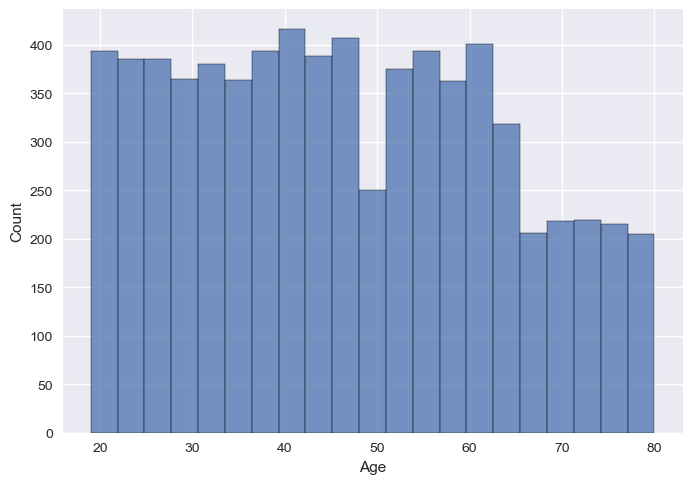

In [16]:
#exploring numerical variables distribution

sns.histplot(data=df_num, x = "Age")
plt.show()

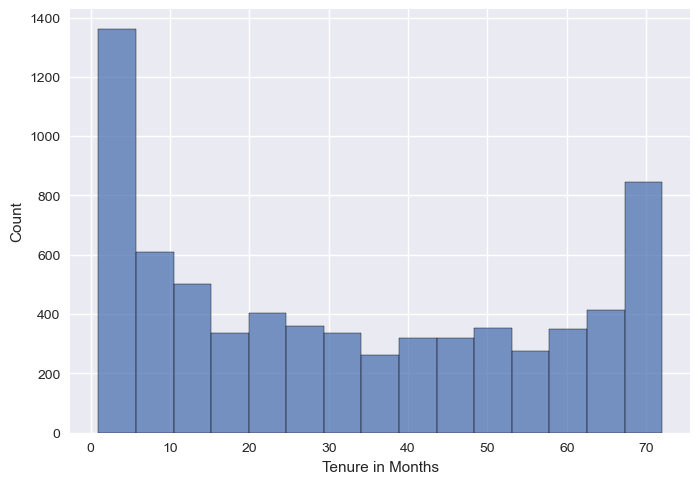

In [17]:
sns.histplot(data=df_num, x = "Tenure in Months")
plt.show()

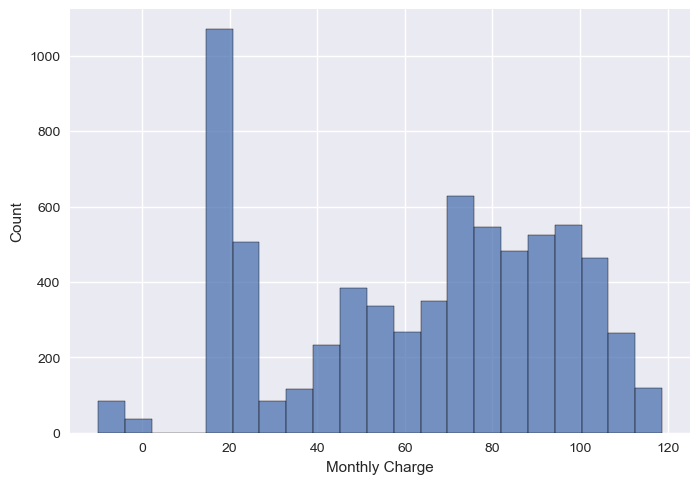

In [18]:
sns.histplot(data=df_num, x = "Monthly Charge")
plt.show()

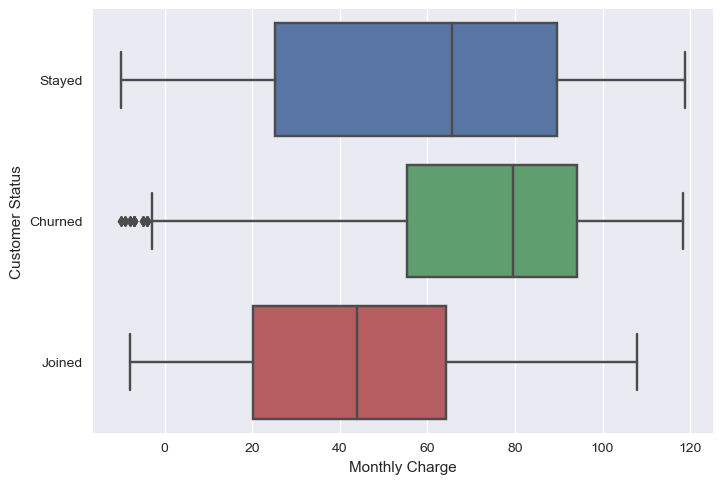

In [19]:
#Monthly charges grouped by customer status
sns.boxplot(data=df, x = "Monthly Charge", y = "Customer Status")
plt.show()

In [20]:
df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,2,9,NaN,Yes,42.39,No,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,0,9,NaN,Yes,10.69,Yes,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,3,3,NaN,Yes,7.38,No,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


<Axes: xlabel='Gender', ylabel='Total Revenue'>

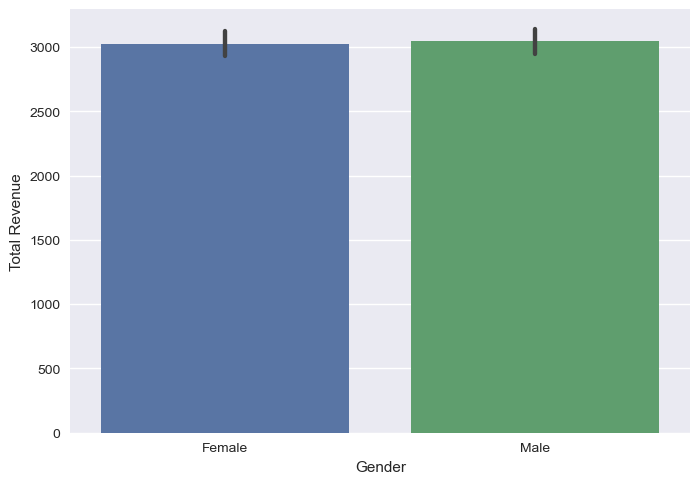

In [21]:
#vizualising categorical variables

sns.barplot(data= df, x= "Gender", y = "Total Revenue")

<Axes: xlabel='Gender', ylabel='Total Revenue'>

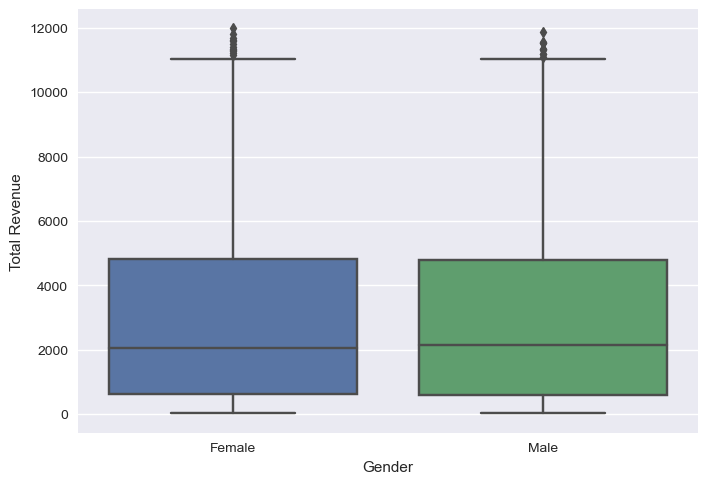

In [22]:
sns.boxplot(data= df, x= "Gender", y= "Total Revenue")

In [23]:
df.duplicated().sum()
#There ar no duplicates

0

In [24]:
#Checking missing values

df.isna().sum().sort_values(ascending= False)

Offer                                3877
Device Protection Plan               1526
Internet Type                        1526
Streaming Music                      1526
Streaming Movies                     1526
Streaming TV                         1526
Premium Tech Support                 1526
Online Backup                        1526
Online Security                      1526
Avg Monthly GB Download              1526
Unlimited Data                       1526
Multiple Lines                        682
Avg Monthly Long Distance Charges     682
Paperless Billing                       0
Total Charges                           0
Payment Method                          0
Total Refunds                           0
Total Extra Data Charges                0
Total Long Distance Charges             0
Total Revenue                           0
Monthly Charge                          0
Gender                                  0
Contract                                0
Age                               

In [25]:
#Exploring using python and having a look to the dataset in Excel.

#There are 7.043 records

#In the Offer field, when a customer was not targeted with any promotion, the value assigned is "None". 
#So in this case, there are no missing values in this column. Maybe we can modify it to "No promotion", no there is no missunderstandings.

#In the services related columns, there are 1.526 missing data, which is fine. This number referred to the number of customers which 
#contracted only Phone service, but no internet service. So makes sense that there is no data related to internet based services for these records.

#Regarding the 682 missing values in the "Avg monthly long distance charges" and "Multiple lines" columns, these belong to customes 
#that only contracted internet based services, but no phone service. So, it makes sense that these 2 fields have no data.


#As I understood that the "missing values" I found make sense in this dataset, I have decided to refined the meaning behing those missing values
#so it is clearer and to avoid losing that data

df['Offer'].fillna('no promotion', inplace=True)
df['Internet Type'].fillna("no internet services", inplace=True)
df['Unlimited Data'].fillna("no internet services", inplace=True)
df['Streaming Music'].fillna("no internet services", inplace=True)
df['Streaming Movies'].fillna("no internet services", inplace=True)
df['Streaming TV'].fillna("no internet services", inplace=True)
df['Device Protection Plan'].fillna("no internet services", inplace=True)
df['Online Backup'].fillna("no internet services", inplace=True)
df['Online Security'].fillna("no internet services", inplace=True)
df['Avg Monthly GB Download'].fillna(0, inplace=True) #0 for this variable to continue being numerical (float)
df['Premium Tech Support'].fillna("no internet services", inplace=True)
df['Avg Monthly Long Distance Charges'].fillna(0, inplace=True) #0 for this variable to continue being numerical (float)
df['Multiple Lines'].fillna("no phone services", inplace=True)

#Checking missing values after modifications

print(df.isna().sum().sort_values(ascending= False))

Gender                               0
Premium Tech Support                 0
Total Revenue                        0
Total Long Distance Charges          0
Total Extra Data Charges             0
Total Refunds                        0
Total Charges                        0
Monthly Charge                       0
Payment Method                       0
Paperless Billing                    0
Contract                             0
Unlimited Data                       0
Streaming Music                      0
Streaming Movies                     0
Streaming TV                         0
Device Protection Plan               0
Age                                  0
Online Backup                        0
Online Security                      0
Avg Monthly GB Download              0
Internet Type                        0
Internet Service                     0
Multiple Lines                       0
Avg Monthly Long Distance Charges    0
Phone Service                        0
Offer                    

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [27]:
#finding out unique values in each categorical variable

non_numeric = df.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Gender column:  2
Number of unique values in Married column:  2
Number of unique values in Offer column:  6
Number of unique values in Phone Service column:  2
Number of unique values in Multiple Lines column:  3
Number of unique values in Internet Service column:  2
Number of unique values in Internet Type column:  4
Number of unique values in Online Security column:  3
Number of unique values in Online Backup column:  3
Number of unique values in Device Protection Plan column:  3
Number of unique values in Premium Tech Support column:  3
Number of unique values in Streaming TV column:  3
Number of unique values in Streaming Movies column:  3
Number of unique values in Streaming Music column:  3
Number of unique values in Unlimited Data column:  3
Number of unique values in Contract column:  3
Number of unique values in Paperless Billing column:  2
Number of unique values in Payment Method column:  3
Number of unique values in Customer Status column:  3


In [28]:
#In this case I will not be dropping discrete variables with too many categories that will not make sense for hot-encoding. I could choose to discard the Offer variable, but I have 
#special interest in discovering how these promotion affected the churn behaviour of the customers

#df = df.drop(["Offer"], axis=1)

In [29]:
df_num.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,37,0,2,9,42.39,16.0,65.6,593.30,0.00,0,381.51,974.81
1,46,0,0,9,10.69,10.0,-4.0,542.40,38.33,10,96.21,610.28
2,50,0,0,4,33.65,30.0,73.9,280.85,0.00,0,134.60,415.45
3,78,0,1,13,27.82,4.0,98.0,1237.85,0.00,0,361.66,1599.51
4,75,0,3,3,7.38,11.0,83.9,267.40,0.00,0,22.14,289.54


                                        Age  Number of Dependents  \
Age                                1.000000             -0.119000   
Number of Dependents              -0.119000              1.000000   
Number of Referrals               -0.025141              0.278003   
Tenure in Months                   0.009927              0.108237   
Avg Monthly Long Distance Charges -0.020010             -0.002898   
Avg Monthly GB Download           -0.566518              0.300802   
Monthly Charge                     0.134511             -0.125649   
Total Charges                      0.059684              0.022535   
Total Refunds                      0.024168              0.014023   
Total Extra Data Charges           0.025036             -0.014436   
Total Long Distance Charges        0.003065              0.068966   
Total Revenue                      0.048265              0.038038   

                                   Number of Referrals  Tenure in Months  \
Age                       

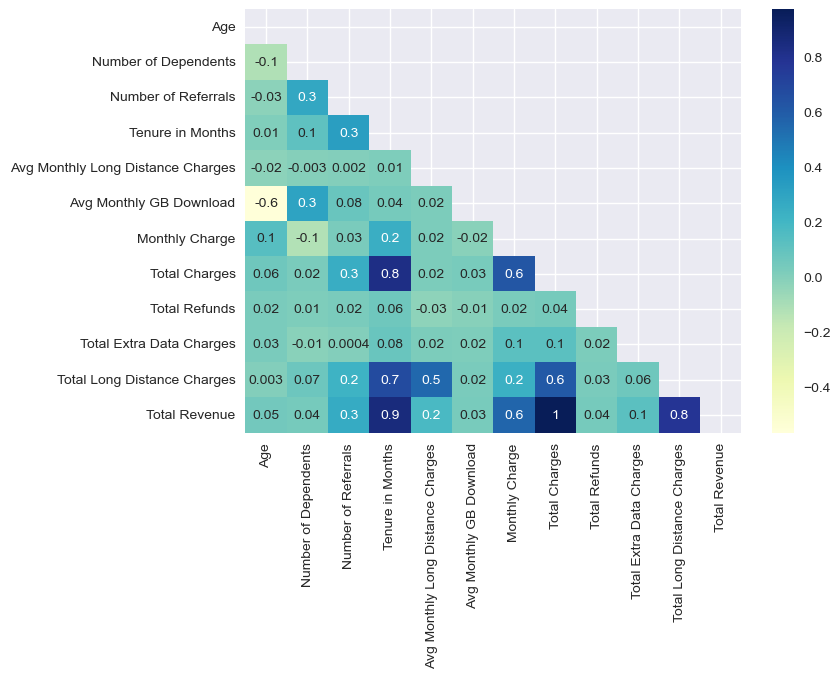

In [30]:
#correlation matrix (only numerical variables)

print(df_num.corr()) 

# creating mask to hide redundant information
mask = np.triu(np.ones_like(df_num.corr()))
  
# plotting correlation heatmap 
dataplot = sns.heatmap(df_num.corr(), cmap="YlGnBu", annot=True, fmt='.1g', mask=mask) 
  
# displaying heatmap 
plt.show() 


In [31]:
#In the Correlation Matrix I observe:
#Age is negatively (-0.6) correlated with Avg monthly GB Download, the older the customer the less GB downloads they use

#Tenure (months) is highly correlated with Total Revenue (0.9), Total Charges (0.8) and Total Long Distance Charges (0.7). It makes sense that the longer the customer has been in the company, 
#the bigger the charges they have received and the bigger the revenue they have generated

#Total Charges is highly correlated with Total Revenue (1). 

#Total Revenue is also highly correlated with Total Long Distance Charges (0.8)

#I will drop "Total Revenue" to avoid Multi-Collinearity in my model.

In [32]:
df = df.drop(["Total Revenue"], axis= 1)

In [33]:
#IF I have extra time: outliers, correlation matrix deeply, ..

In [34]:
#For the Classification Model I could create a new variable called 
# "Churn" = 1 if Customer status = Churned or 0 if Customer Status = Joined or Stayed; but in the next step (one-hot-encoding), I will get
# what I need from the dissasociation of the Customer Status variable

#df["Churn"] = np.where(df["Customer Status"] == "Churned", 1, 0)




In [35]:
#One-hot-encoding --> preparing categorical data for my Machine Learning Model

df_cat = df.select_dtypes(include= object).info()

df_encoded = pd.get_dummies(df, columns = df_cat)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  7043 non-null   object
 1   Married                 7043 non-null   object
 2   Offer                   7043 non-null   object
 3   Phone Service           7043 non-null   object
 4   Multiple Lines          7043 non-null   object
 5   Internet Service        7043 non-null   object
 6   Internet Type           7043 non-null   object
 7   Online Security         7043 non-null   object
 8   Online Backup           7043 non-null   object
 9   Device Protection Plan  7043 non-null   object
 10  Premium Tech Support    7043 non-null   object
 11  Streaming TV            7043 non-null   object
 12  Streaming Movies        7043 non-null   object
 13  Streaming Music         7043 non-null   object
 14  Unlimited Data          7043 non-null   object
 15  Cont

In [36]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 67 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age                                          7043 non-null   int64  
 1   Number of Dependents                         7043 non-null   int64  
 2   Number of Referrals                          7043 non-null   int64  
 3   Tenure in Months                             7043 non-null   int64  
 4   Avg Monthly Long Distance Charges            7043 non-null   float64
 5   Avg Monthly GB Download                      7043 non-null   float64
 6   Monthly Charge                               7043 non-null   float64
 7   Total Charges                                7043 non-null   float64
 8   Total Refunds                                7043 non-null   float64
 9   Total Extra Data Charges                     7043 non-null   int64  
 10  

In [37]:
#I´ll drop both columns representing customers that joined or stayed in the company, since I already have that information in the "Customer Status_Churned" variable
# that I will be using as the target variable in my model

df_encoded = df_encoded.drop(["Customer Status_Joined", "Customer Status_Stayed"], axis=1)

# Classification Machine Learning Model

In [38]:
# Declaring the feature (independent) variable(s). I will use all except the target variable.
X = df_encoded.drop(['Customer Status_Churned'], axis=1)

# Declaring the target (dependent) variable 

Y = df_encoded['Customer Status_Churned']

In [51]:
# Spliting the data into training and testing sets (e.g., 80% train, 20% test)
# Using the train_test_split function from the sklearn.model_selection library
## A random_state of 42 is set for reproducibility

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=42) 

print(f'whole dataset: {len(X)} \n\n---------------------\n')
print(f'train sample: {len(X_train)} \n\n---------------------\n')
print(f'test sample: {len(X_test)}')

whole dataset: 7043 

---------------------

train sample: 5634 

---------------------

test sample: 1409


In [40]:
#There is an imbalance class issue in our model

Y_train.value_counts()

Customer Status_Churned
False    4139
True     1495
Name: count, dtype: int64

In [41]:
#1. Model 1 -- Logistic Regression

#Fitting the model

logreg = LogisticRegression() 

logreg.fit(X_train, Y_train)



LogisticRegression()

In [42]:
#Evaluation of the Logistic Regression Model

lr_predictions = logreg.predict(X_test)
print(f"Logistic Regression Accuracy Score: {accuracy_score(Y_test, lr_predictions)}")

Logistic Regression Accuracy Score: 0.7835344215755855


In [43]:
#Using the train data, predict probabilities on the test set
logreg.predict_proba(X_test)[:,1]

array([0.06055039, 0.78858444, 0.58944928, ..., 0.52958002, 0.20204622,
       0.35060707])

In [44]:
#Looking at the estimated values that we get in the test set
Y_pred = logreg.predict(X_test)

In [45]:
#Having a look to the predictions vs the values in the test set

test_result = pd.DataFrame({'y_pred_prob':logreg.predict_proba(X_test)[:,1],
                            'y_pred':logreg.predict(X_test),
                            'y_test':Y_test})
test_result

,y_pred_prob,y_pred,y_test
455,0.060550,False,False
2301,0.788584,True,False
2255,0.589449,True,False
4527,0.348598,False,False
3812,0.009438,False,False
...,...,...,...
5191,0.453098,False,False
4510,0.683905,True,False
3910,0.529580,True,False
4820,0.202046,False,False


In [46]:
#More ways to evaluate our model

from sklearn.metrics import precision_score, recall_score

precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print('Precision:', precision)
print('Recall:', recall)

#the precision score is relatively high, but the recall score is lower, indicating that the model is not good at identifying positive cases (churn cases)

Precision: 0.6161616161616161
Recall: 0.4893048128342246


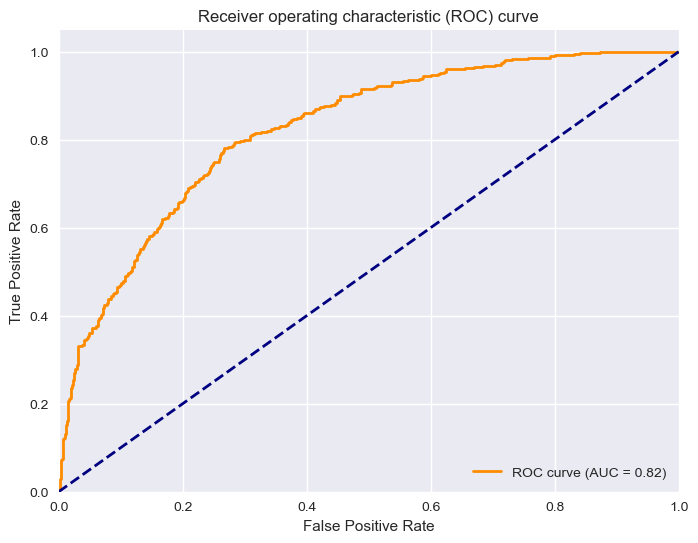

AUC score: 0.8228138159084449


In [47]:
#The ROC curve and AUC score are useful metrics for evaluating the model’s overall performance

from sklearn.metrics import roc_curve, auc

y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print('AUC score:', roc_auc)


In [48]:
# I will also compare these evaluation metrics with balanced accuracy, a metric that takes into consideration the class imbalance by averaging the recal score of each class.
from sklearn.metrics import balanced_accuracy_score

y_pred = logreg.predict(X_test)
balanced_acc = balanced_accuracy_score(Y_test, y_pred)

print('Balanced accuracy:', balanced_acc)

# We can observe that Balanced accuracy is way smaller than regular accuracy. Which makes it a better metric to evaluate the model in case of imbalance.


Balanced accuracy: 0.6895799426489964


In [49]:
#Confussion matrix
print(confusion_matrix(Y_test, Y_pred))

#We can see that this model is doing a good job predicting churned cases when the are actually true (TP = 921), and a decent job identifying no churn cases when there was no churn (TN = 183).
#However, there is still some room for improvement (FN = 191 and FP = 114)

[[921 114]
 [191 183]]



<img src="confusion_matrix.png" width="450" height="400">

In [1]:
#Now we will run the same logistic model, addressing the Class imbalance that we observed before, to see if this improve the model accuracy.

#Handling the Class imbalance it´s important because on such data, models become good at predicting the majority class but perform poorly on the minority class.
#There are numerous techniques to handle class imbalance (undersampling, Oversampling (SMOTE), Ensemble Method, Class Weights, Focal Loss...)
#These techniques should only be applied to the training data and the resulting model should be evaluated on the original test data.


In [53]:
#SMOTE is particularly useful when the class imbalance is severe and the minority class is significantly underrepresented. It is also useful when there is 
#limited data available for the minority class, as it can create additional synthetic samples to improve model performance.

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print('Classification report:\n', classification_report(Y_test, y_pred))
print('Balanced Classification report:\n', balanced_accuracy_score(Y_test, y_pred))

# Apply SMOTE oversampling to the training data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, Y_train)

lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
y_pred = lr.predict(X_test)

# Evaluate the performance of the model on the resampled test data
print('SMOTE Classification report:\n', classification_report(Y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1035
        True       0.62      0.49      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

Balanced Classification report:
 0.6895799426489964
SMOTE Classification report:
               precision    recall  f1-score   support

       False       0.90      0.70      0.79      1035
        True       0.49      0.79      0.60       374

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.72      0.74      1409



In [ ]:
#From this results we can see that after applying the SMOTE method to deal with the imbalance class issue,
# the accuracy is 0.72, which is close to the regular accuracy score (0.78), and higher than the balanced accuracy
#score (0.68)

In [ ]:
#Next step is to try other classification models, to find the best one for our chun prediction case

In [55]:
# Select Features
feature = df_encoded.drop('Customer Status_Churned', axis=1)

# Select Target
target = df_encoded['Customer Status_Churned']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (5634, 64)
Shape of testing feature: (1409, 64)
Shape of training label: (5634,)
Shape of testing label: (1409,)


I will use 6 metrics below to evaluate these models:

Accuracy: the proportion of true results among the total number of cases examined.

Accuracy=TP+TN/ (TP+TN+FP+FN)

Precision: used to calculate how much proportion of all data that was predicted positive was actually positive.

Precision=TP/ (TP+FP)

Recall: used to calculate how much proportion of actual positives is correctly classified.

Recall=TP/ (TP+FN)

F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall.

F1=2TP/ (2TP+FP+FN)

Cohen Kappa Score: Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories.

κ=(po−pe)/(1−pe)

where  po  is the empirical probability of agreement on the label assigned to any sample (the observed agreement ratio), and  pe  is the expected agreement when both annotators assign labels randomly.  pe  is estimated using a per-annotator empirical prior over the class labels.
Area Under Curve (AUC): indicates how well the probabilities from the positive classes are separated from the negative classes

In [56]:
#Defining a function to evaluate each trained model and with the metrics mentioned above and save the score to a variable

def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## Decision Tree

Advantages:

* Inexpensive to construct
* Extremely fast at classifying unknown records
* Easy to interpret for small-sized trees•
* Accuracy is comparable to other classification techniques for many simple data sets

Disadvantages:

* Overfitting when algorithm capture noise in the data
* The model can get unstable due to small variation of data
* Low biased tree: difficult for the model to work with new data


In [57]:
#DECISION TREE

from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [58]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.772888573456352
Precision: 0.5436893203883495
Recall: 0.6292134831460674
F1 Score: 0.5833333333333333
Cohens Kappa Score: 0.4283743762424439
Area Under Curve: 0.7253379856376111
Confusion Matrix:
 [[865 188]
 [132 224]]


## Random Forest

Advantages:

* It can be used for both regression and classification tasks and that it’s easy to view the relative importance it assigns to the input features.
* It is also considered as a very handy and easy to use algorithm, because it’s default hyper-parameters often produce a good prediction result.

Disadvantages:

* Many trees can make the algorithm to slow and ineffective for real-time predictions. A more accurate prediction requires more trees, which results in a slower model.
* It is a predictive modelling tool and not a descriptive tool.

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [60]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.850958126330731
Precision: 0.7310126582278481
Recall: 0.648876404494382
F1 Score: 0.6875
Cohens Kappa Score: 0.5900983021544464
Area Under Curve: 0.905486731329428
Confusion Matrix:
 [[968  85]
 [125 231]]


## Naive Bayes

Advantages:
* It is simple and easy to implement
* It doesn’t require as much training data
* It handles both continuous and discrete data
* It is highly scalable with the number of predictors and data points
* It is fast and can be used to make real-time predictions
* It is not sensitive to irrelevant features 

Disadvantages:

* The Naive Bayes Algorithm has trouble with the ‘zero-frequency problem’. It happens when you assign zero probability for categorical variables in the training dataset that is not available. When you use a smooth method for overcoming this problem, you can make it work the best.
* It will assume that all the attributes are independent, which rarely happens in real life. It will limit the application of this algorithm in real-world situations.
* It will estimate things wrong sometimes, so you shouldn’t take its probability outputs seriously

In [61]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [62]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.7182398864442867
Precision: 0.46889226100151743
Recall: 0.8679775280898876
F1 Score: 0.6088669950738916
Cohens Kappa Score: 0.417881899457503
Area Under Curve: 0.847415623632852
Confusion Matrix:
 [[703 350]
 [ 47 309]]


## K-Nearest Neighbors

Advantages:

* Simple technique that is easily implemented
* Building model is cheap
* Extremely flexible classification scheme

Disadvantages:

* Classifying unknown records are relatively expensive
* Requires distance computation of k-nearest neighbors
* Computationally intensive, especially when the size of the training set grows
* Accuracy can be severely degraded by the presence of noisy or irrelevant features

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.7572746628814763
Precision: 0.5269230769230769
Recall: 0.3848314606741573
F1 Score: 0.4448051948051948
Cohens Kappa Score: 0.29428666830691363
Area Under Curve: 0.7106994995571774
Confusion Matrix:
 [[930 123]
 [219 137]]


# Models Comparison

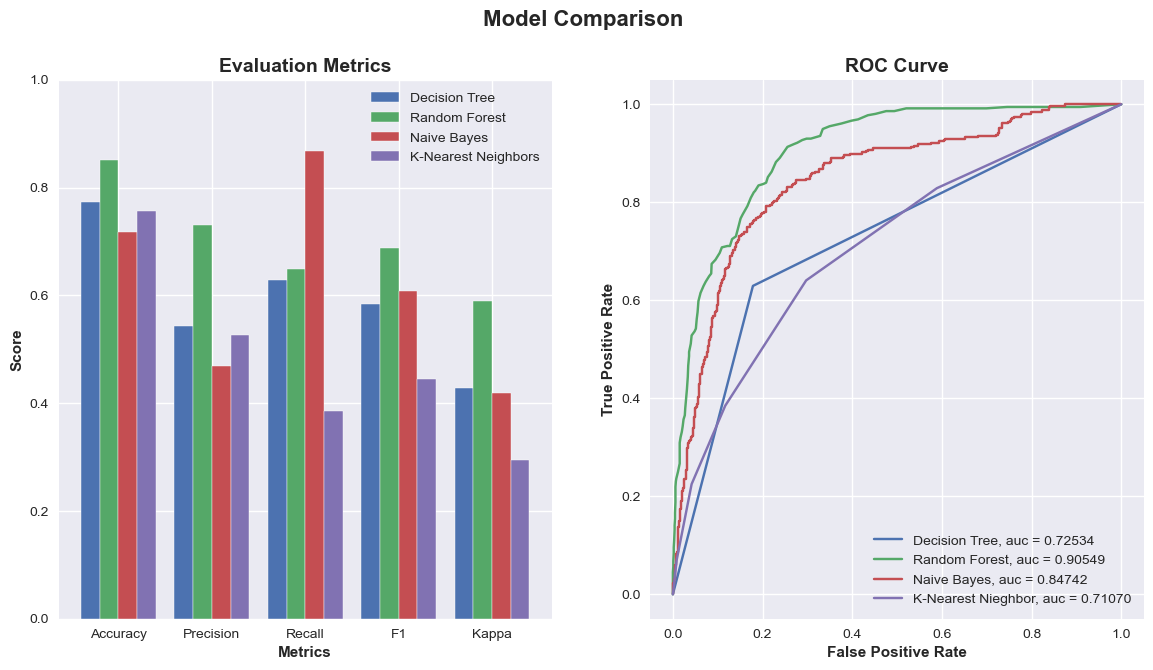

In [65]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [ ]:
#From the chart above, I can observe that the Random Forest it´s the winner model in all the evaluation metrics (except for Recall). 
#So I think it´s the right choice to solve this business case.

# Model Optimization


In [69]:
from sklearn.metrics import get_scorer_names
get_scorer_names() 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

I will use the GridSearchCV functionality from sklearn to fin the optimal parameter for our refined model. 
I will provide the Random Forest baseline model (rf_grids), scoring method (accuracy), and also various parameters value we want to try with our model. The GridSearchCV function will then iterate through each parameters combination to find the best scoring parameters.

This function uses cross validation to train the model. On each iteration our data will be split into 5 fold. The model will be trained on 4/5 folds, leaving the final fold for validation data (repeated for 5 times until all folds have being used as validation data)

In [70]:
#Now I will try to optimize our Random Forest model by tunning the hyper parameters (using the scikit-learn library) and then i will evaluate this refined model with the baseline one and see
#which one performs better

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='accuracy',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


{'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

## Evaluation of the Optimized Model

In [71]:
#Now I can access the best_estimator_ attribute of the GridSearchCV object to save our optimised model into variable called best_grid

# Select best model with best fit
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval = evaluate_model(best_grid, X_test, y_test)

# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Cohens Kappa Score:', best_grid_eval['kappa'])
print('Area Under Curve:', best_grid_eval['auc'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

Accuracy: 0.8452803406671399
Precision: 0.7331081081081081
Recall: 0.6095505617977528
F1 Score: 0.6656441717791411
Cohens Kappa Score: 0.5661038880319134
Area Under Curve: 0.9017947650906453
Confusion Matrix:
 [[974  79]
 [139 217]]


## Models Comparison
RF baseline vs Optimized RF

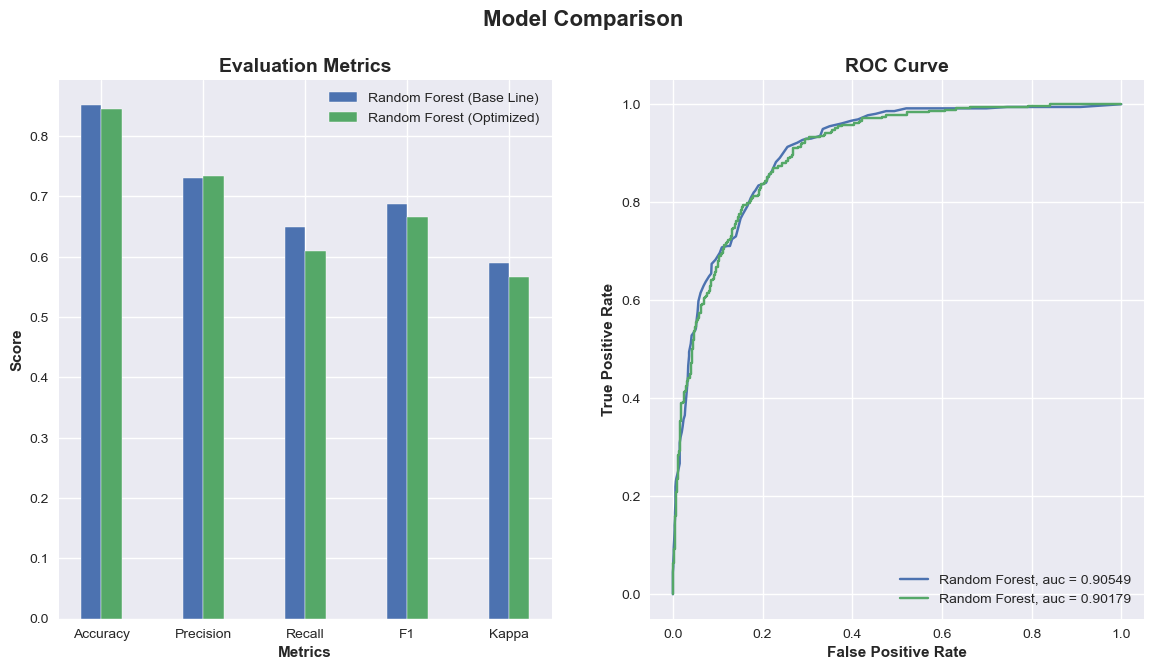

Change of -0.67% on accuracy.
Change of 0.29% on precision.
Change of -6.06% on recall.
Change of -3.18% on F1 score.
Change of -4.07% on Kappa score.
Change of -0.41% on AUC.


In [72]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1'], best_grid_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest (Base Line)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='Random Forest (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(best_grid_eval['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval['acc'] - rf_eval['acc']) / rf_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval['prec'] - rf_eval['prec']) / rf_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval['rec'] - rf_eval['rec']) / rf_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval['f1'] - rf_eval['f1']) / rf_eval['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval['kappa'] - rf_eval['kappa']) / rf_eval['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval['auc'] - rf_eval['auc']) / rf_eval['auc'])))

In [73]:
#The RF Optimized model is just perfoming a bit better than the original model on precision. So, I decide to stick with the original model for the prediction and most of the evaluation
#metrics show better results

## Output

Now that I have chosen the right model for this case, I will create a prediction based on new data and then save the model usin joblib, so we can save it for later.

## Prediction
In this step we will predict the expected outcome of all the row from our dataset then save it into a csv file for easier access in the future

In [74]:
df_encoded['Customer Status_Churned'] = rf.predict(feature)
df_encoded['Customer Status_Churned'] = df_encoded['Customer Status_Churned'].apply(lambda x: 'Churn' if x==True else 'no churn risk')

# Save new dataframe into csv file
df_encoded.to_csv('churn_prediction.csv', index=False)

df_encoded.head(10)

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,...,Unlimited Data_no internet services,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Customer Status_Churned
0,37,0,2,9,42.39,16.0,65.60,593.30,0.00,0,...,False,False,True,False,False,True,False,True,False,no churn risk
1,46,0,0,9,10.69,10.0,-4.00,542.40,38.33,10,...,False,True,False,False,True,False,False,True,False,no churn risk
2,50,0,0,4,33.65,30.0,73.90,280.85,0.00,0,...,False,True,False,False,False,True,True,False,False,Churn
3,78,0,1,13,27.82,4.0,98.00,1237.85,0.00,0,...,False,True,False,False,False,True,True,False,False,Churn
4,75,0,3,3,7.38,11.0,83.90,267.40,0.00,0,...,False,True,False,False,False,True,False,True,False,Churn
5,23,3,0,9,16.77,73.0,69.40,571.45,0.00,0,...,False,True,False,False,False,True,False,True,False,no churn risk
6,67,0,1,71,9.96,14.0,109.70,7904.25,0.00,0,...,False,False,False,True,False,True,True,False,False,no churn risk
7,52,0,8,63,12.96,7.0,84.65,5377.80,0.00,20,...,False,False,False,True,False,True,False,True,False,no churn risk
8,68,0,0,7,10.53,21.0,48.20,340.35,0.00,0,...,False,False,False,True,False,True,True,False,False,no churn risk
9,43,1,3,65,28.46,14.0,90.45,5957.90,0.00,0,...,False,False,False,True,False,True,False,True,False,no churn risk


In [ ]:
## Saving the model for further reusability

#from joblib import dump, load

# Saving model
#dump(rf, 'customer_churn_classification.joblib')
# Loading model
# clf = load('bancustomer_churn_classification.joblib') 

# Conclusion

In simpler terms, our model did a decent job at classifying the data, but it's not perfect. One area where it struggled with is Recall. We're only capturing about 60% of potential churned customers, missing out on the remaining 40%. Even after fine-tuning the model using GridSearchCV, the improvement wasn't significant, suggesting we might have reached the model's limit. To boost performance, we could explore using a different algorithm like GradientBoostingClassifier.

# References

1. Telkom Digital Talent Incubator - Data Scientist Module 5 (Classification)
2. Scikit-learn Documentation
3. The 5 Classification Evaluation metrics every Data Scientist must know
4. The Python Graph Gallery - Grouped Bar Plot

lista de referencias